In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('telecom.csv')

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [33]:
def conv(value):
    if value == 0:
        return 'No'
    else:
        return 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [34]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0') 
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


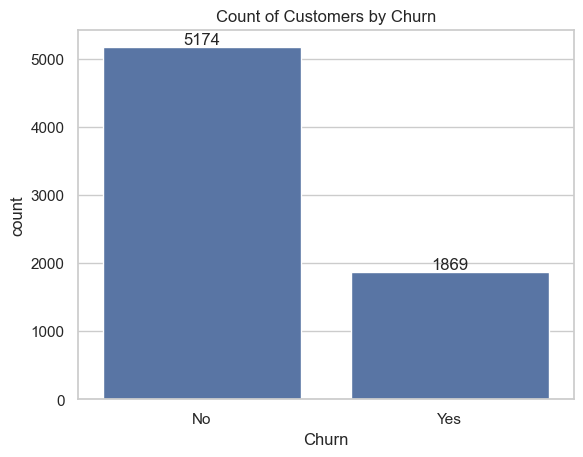

In [37]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

[]

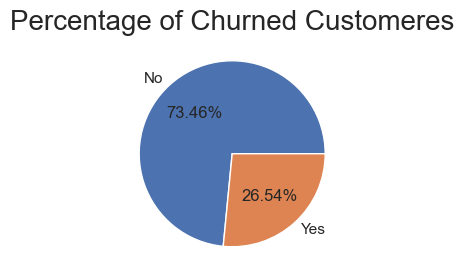

In [38]:
ag = df.groupby('Churn').agg({'Churn': "count"})
plt.figure(figsize = (3,4))
plt.pie(ag['Churn'] , labels = ag.index , autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres" , fontsize = 20)
plt.plot()

## from the given pie chart we can conclude that 26.54% of our customers have churned out.

[Text(0, 0, '5901'), Text(0, 0, '1142')]

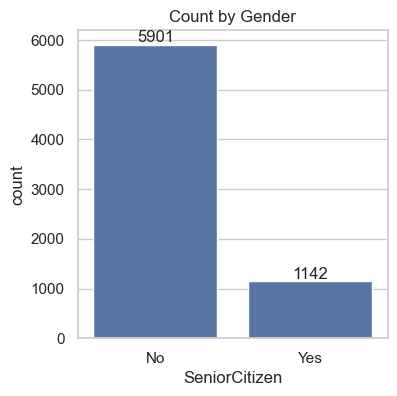

In [39]:
plt.figure(figsize = (4,4))
plt.title("Count by Gender")
ax = sns.countplot(x = df['SeniorCitizen'] , data = df )
ax.bar_label(ax.containers[0])


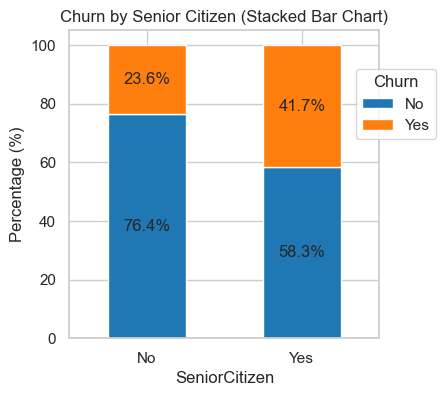

In [40]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

## comparative a greater pecentage of people in senior citizen category have churned

<Axes: xlabel='tenure', ylabel='Count'>

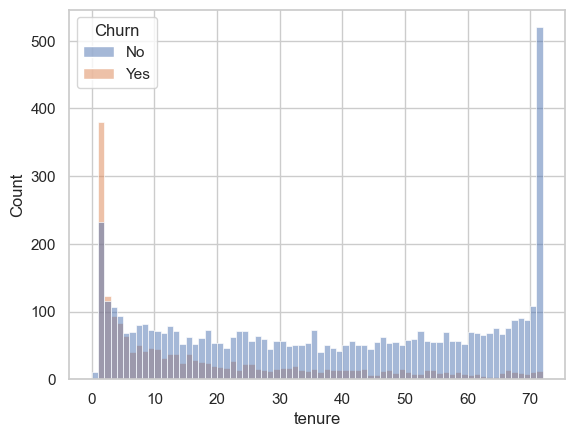

In [41]:
sns.histplot(x = 'tenure' , data = df , hue = 'Churn' , bins = 72)

## people who have used our services for a long time have stayed and people who have used our sevices
## 1 or 2 months have churned

[Text(0, 0, '2220'), Text(0, 0, '1307'), Text(0, 0, '1647')]

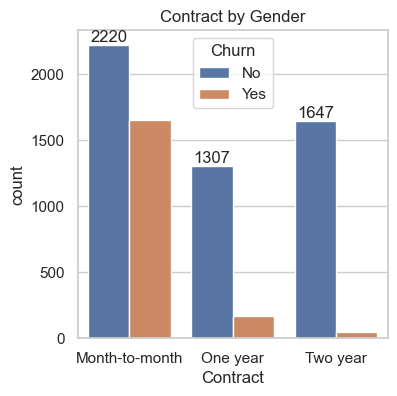

In [42]:
plt.figure(figsize = (4,4))
plt.title("Contract by Gender")
ax = sns.countplot(x = df['Contract'] , data = df , hue = 'Churn' )
ax.bar_label(ax.containers[0])


#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

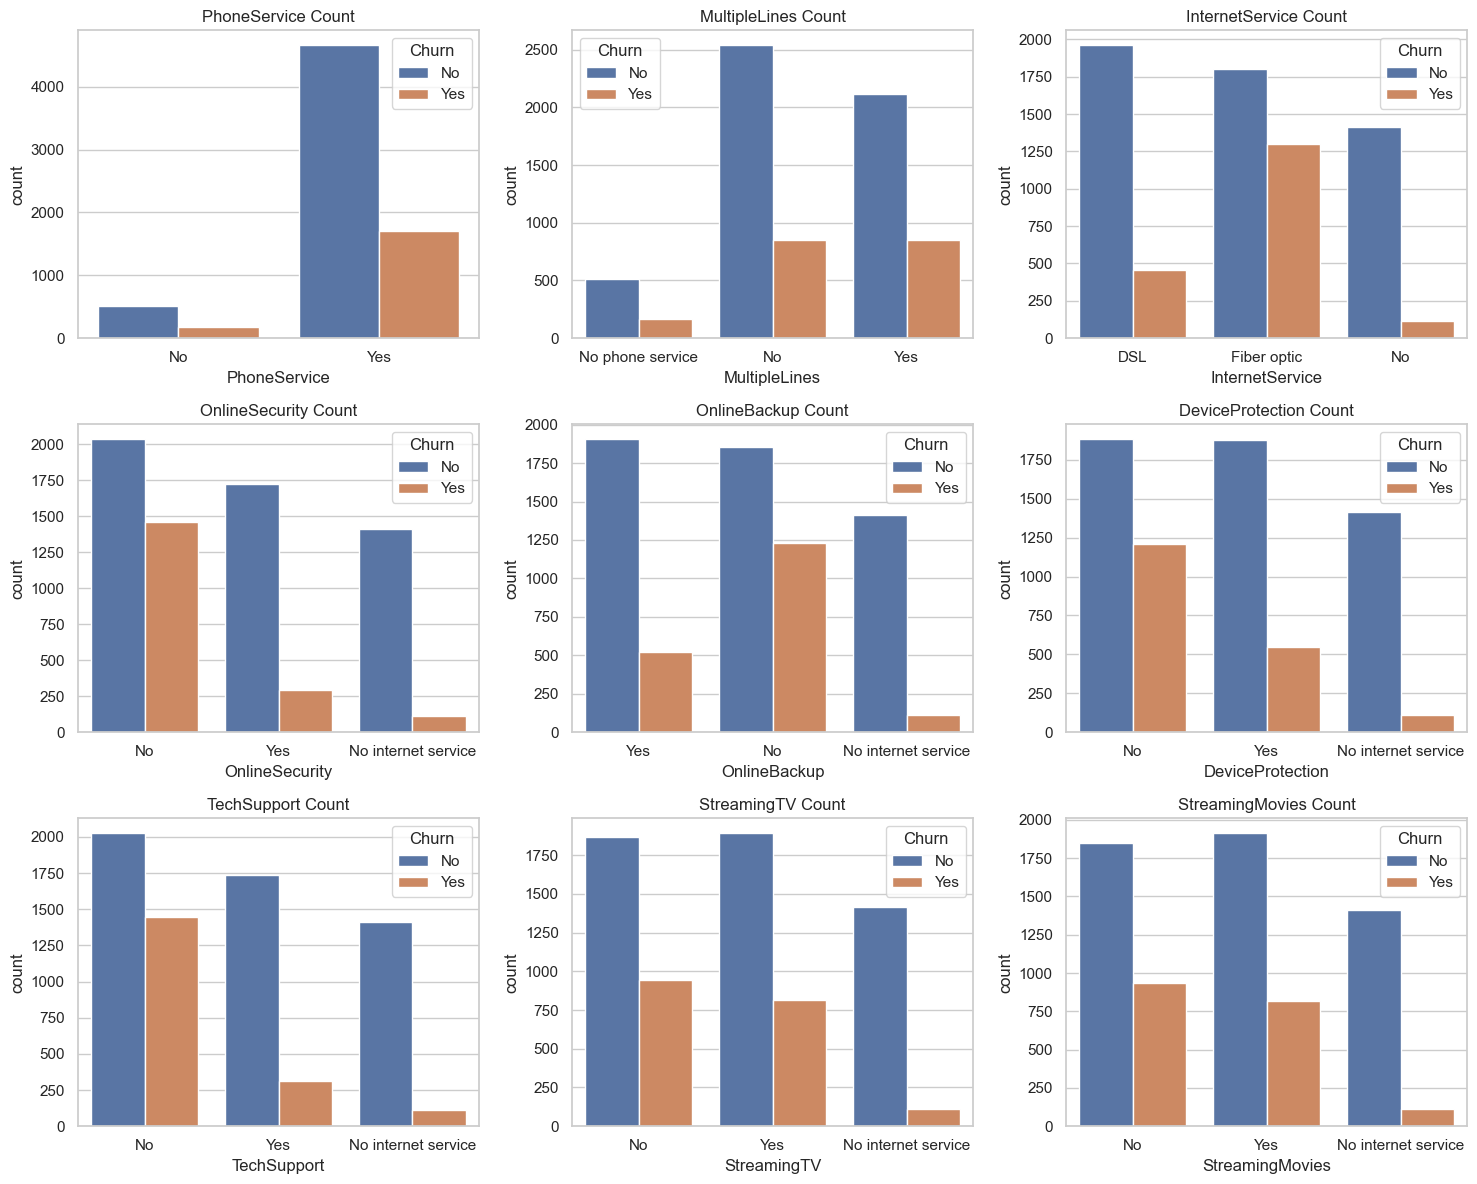

In [44]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots - 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Make axes flat so we can loop through them easily
axes = axes.flatten()

# Create count plot for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i] , hue = df['Churn'])
    axes[i].set_title(f'{column} Count')
    axes[i].tick_params(axis='x', rotation=0)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.show()

**Customers without extra services like OnlineBackup, TechSupport, or StreamingTV are more likely to churn.**

**Fiber optic internet users also show higher churn rates compared to DSL.**

**Generally, customers with fewer services are more likely to leave the company.**

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

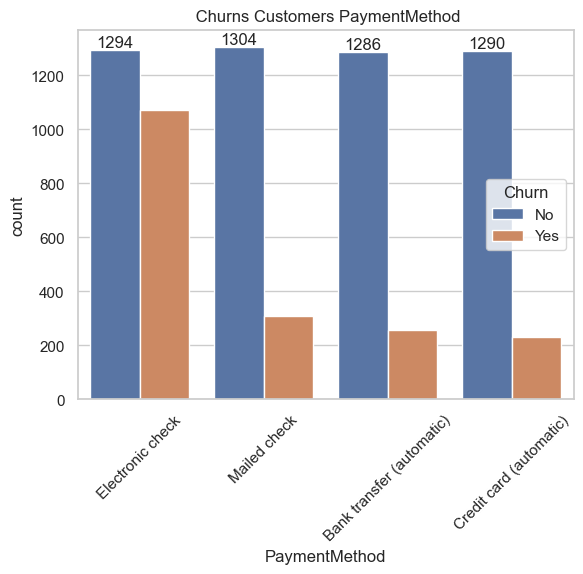

In [45]:

plt.title(" Churns Customers PaymentMethod")
ax = sns.countplot(x = df['PaymentMethod'] , data = df , hue = 'Churn' )
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)



# Customers is more Churning in ELECTRONIC CHECK as Payment method